# Analysis of Levelling Table/Book

Surveyors will traditionaly only calculate the reduce level and plot the result in the for of a profile drawing.

I this exercise, I will take the calculation further by making some useful statistical calculations and analysis.

Am going to use three main packages called <a href="http://www.numpy.org/">numpy</a>, <a href="http://pandas.pydata.org/">pandas</a> and <a href="http://matplotlib.org/">matplotlib</a>.

The Data (in .csv format) used is available for <a href="https://drive.google.com/file/d/0B9Q9hs9vPVB6bDVOdmVGSnlteVE/view?usp=sharing">download here</a>. Download it and save it at thesame location with this notebook.

<br />
<b>Author:</b> <a href="http://umaryusuf.com/">Umar Yusuf</a><br />
http://umar-yusuf.blogspot.com.ng/2016/08/Analyzing-Surveyors-Level-Field-Table-Book-with-Python.html

# Tasks to be completed

We are going to run through the following tasks:-<br />
1) Clean the data<br />
2) Descriptive Statistical Analysis<br />
3) Check Levelling Error<br />
4) Visualise the Profile (Distance Vs Reduce level)<br />

In [433]:
# Lets import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lets enable our plot to display inline within notebook
%matplotlib inline

### Loading the Levelling table in .csv format

In [434]:
level_table = pd.read_csv("Level_Book.csv")
level_table.round(3)

,Point,Back Sight,Intermediate Sight,Fore Sight,Rise,Fall,Reduce Level,Distance
0,Datum,2.395,NaN,NaN,NaN,NaN,10.000,NaN
1,A,NaN,2.050,NaN,0.345,NaN,10.345,5.0
2,B,NaN,1.970,NaN,0.080,NaN,10.425,15.0
3,C,NaN,1.888,NaN,0.082,NaN,10.507,25.0
4,D,NaN,1.808,NaN,0.080,NaN,10.587,35.0
5,E,NaN,1.722,NaN,0.086,NaN,10.673,45.0
6,F,NaN,1.664,NaN,0.058,NaN,10.731,55.0
7,G,NaN,1.609,NaN,0.055,NaN,10.786,65.0
8,H,NaN,1.534,NaN,0.075,NaN,10.861,75.0
9,I,1.732,NaN,1.493,0.041,NaN,10.902,85.0


### Compare Original table and the imported table
##### Our imported data will look slightly different in the sense that, all enpty cells will read as "NaN" as seen above. NaN statnds for "Not A Number".

<img src="Level_book.bmp" width="700" />

# 1) Clean the data
Now, lets perform some cleaning to the data.

In [435]:
# lets replace the NaN with 0.000. But first let see the titles of the colums

level_table.columns

Index(['Point', 'Back Sight', 'Intermediate Sight', 'Fore Sight', 'Rise',
       'Fall', 'Reduce Level', 'Distance'],
      dtype='object')

In [436]:
# Replace NaN with empty space for all columns

level_table_cleaned = level_table.fillna('')
# level_table_cleaned = level_table.replace(np.nan, '')

level_table_cleaned

,Point,Back Sight,Intermediate Sight,Fore Sight,Rise,Fall,Reduce Level,Distance
0,Datum,2.395,,,,,10.000,
1,A,,2.05,,0.345,,10.345,5
2,B,,1.97,,0.08,,10.425,15
3,C,,1.888,,0.082,,10.507,25
4,D,,1.808,,0.08,,10.587,35
5,E,,1.722,,0.086,,10.673,45
6,F,,1.664,,0.058,,10.731,55
7,G,,1.609,,0.055,,10.786,65
8,H,,1.534,,0.075,,10.861,75
9,I,1.732,,1.493,0.041,,10.902,85


<p style="color:orange">Now the table looks cleaner an just as it looks in the original csv file. <br />
However, this will not allow numerical analysis performed on any colum with white space or NaN value. So instead, I will replace that with 0.000</p>

In [437]:
# Replace white space with 0.000 for all columns

level_table_zeros = level_table.fillna(0.000)
level_table_zeros

,Point,Back Sight,Intermediate Sight,Fore Sight,Rise,Fall,Reduce Level,Distance
0,Datum,2.395,0.000,0.000,0.000,0.000,10.000,0.0
1,A,0.000,2.050,0.000,0.345,0.000,10.345,5.0
2,B,0.000,1.970,0.000,0.080,0.000,10.425,15.0
3,C,0.000,1.888,0.000,0.082,0.000,10.507,25.0
4,D,0.000,1.808,0.000,0.080,0.000,10.587,35.0
5,E,0.000,1.722,0.000,0.086,0.000,10.673,45.0
6,F,0.000,1.664,0.000,0.058,0.000,10.731,55.0
7,G,0.000,1.609,0.000,0.055,0.000,10.786,65.0
8,H,0.000,1.534,0.000,0.075,0.000,10.861,75.0
9,I,1.732,0.000,1.493,0.041,0.000,10.902,85.0


# 2) Descriptive statistical analysis

Lets see Descriptive statistical values for the table

In [438]:
level_table_zeros.describe()

,Back Sight,Intermediate Sight,Fore Sight,Rise,Fall,Reduce Level,Distance
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.217211,1.607211,0.217211,0.047474,0.047474,10.557737,85.263158
std,0.659942,0.741558,0.677847,0.080560,0.080399,0.259599,55.838897
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,0.000000,1.636500,0.000000,0.000000,0.000000,10.421500,40.000000
50%,0.000000,1.859000,0.000000,0.000000,0.000000,10.587000,85.000000
75%,0.000000,2.031000,0.000000,0.077500,0.074500,10.753000,130.000000
max,2.395000,2.289000,2.634000,0.345000,0.345000,10.902000,175.000000


<p style="color:red" >The result above may only be meaningfull to the "Reduce Level" column. But never mind this is just for sake of demonstration.</p>

# 3) Checking Level Error

Remember that in other to check a level table computation for errors, we have to compare the defference in the sum of <i>"Back-sight and Fore-sight"</i>, <i>Rise and Fall</i> and <i>Last and First reduce level</i>. And if the defferences are thesame, then we say our table arithmetics and observations are correct.

Let do that...

Lets redefine the columns of interest to give then shorter name as follow;-<br />
$Back Sight = BS$<br />
$Fore Sight = FS$<br />
$Rise = Rise$<br />
$Fall = Fall$<br />
$First Reduce Level = FRL$<br />
$Last Reduce Level = LRL$

In [439]:
# Sum each column and save it in redefine column name as variable
BS = level_table["Back Sight"].sum()
FS = level_table["Fore Sight"].sum()
Rise = level_table["Rise"].sum()
Fall = level_table["Fall"].sum()

# Use round() method to round Rise to 3 decimals
Rise = round(Rise, 3)

# Getting the values of the FRL and LRL
FRL = level_table["Reduce Level"][0]
LRL = level_table["Reduce Level"][18]

BS, FS, Rise, Fall, FRL, LRL

(4.127, 4.127, 0.902, 0.902, 10.0, 10.0)

In [440]:
# Checking the arithmetic for error
# the result should be turple of thesame number.
BS - FS, Rise - Fall, LRL - FRL

(0.0, 0.0, 0.0)

# 4) Visualise the Profile (Distance Vs Reduce level)

This is probably the common use of a levelling data table (plotting of profile).

Let Visualise the relationship that exist between these two columns - Reduce level and Distance using the matplotlib package.

x-axis will be Distance column while y-axis will be the Reduce level column.

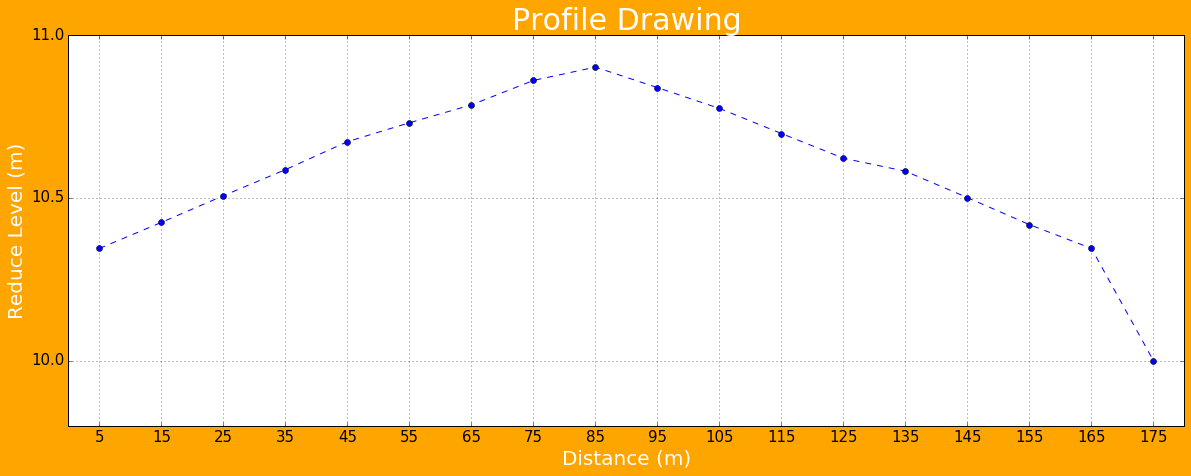

In [441]:
x = level_table["Distance"]
y = level_table["Reduce Level"]

plt.figure(figsize=(20, 7), facecolor='orange')

plt.plot(x, y, linestyle="dashed", marker="o", color="blue")

plt.title("Profile Drawing", size=30, color="white")
plt.xlabel("Distance (m)", size=20, color="white")
plt.ylabel("Reduce Level (m)", size=20, color="white")

plt.xticks([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175], size=15)
plt.yticks([10, 10.5, 11], size=15)

plt.grid()

plt.show()

That is it! Now you got some analysis to perform on your level observations.

<b>Author:</b> <a href="http://umaryusuf.com/">Umar Yusuf</a><br />
http://umar-yusuf.blogspot.com.ng/2016/08/Analyzing-Surveyors-Level-Field-Table-Book-with-Python.html